In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

### 一、数据了解

In [2]:
# 加载数据集
boston  = datasets.load_boston()
# 查看数据集特征
print(dir(boston))

['DESCR', 'data', 'feature_names', 'target']


In [3]:
# 查看数据集描述
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [26]:
'''
实例数量: 506
属性数量: 13 

数值型或类别型，帮助预测的属性
:中位数（第14个属性）经常是学习目标

属性信息 (按顺序):
    CRIM     城镇人均犯罪率
    ZN       占地面积超过2.5万平方英尺的住宅用地比例
    INDUS    城镇非零售业务地区的比例
    CHAS     查尔斯河虚拟变量 (= 1 如果土地在河边；否则是0)
    NOX      一氧化氮浓度（每1000万份）
    RM       平均每居民房数
    AGE      在1940年之前建成的所有者占用单位的比例
    DIS      与五个波士顿就业中心的加权距离
    RAD      辐射状公路的可达性指数
    TAX      每10,000美元的全额物业税率
    PTRATIO  城镇师生比例
    B        1000(Bk - 0.63)^2 其中 Bk 是城镇的黑人比例
    LSTAT    人口中地位较低人群的百分数
    MEDV     以1000美元计算的自有住房的中位数

'''


In [5]:
# 获取数据集的特征数据及目标值
x = boston.data
y = boston.target

In [6]:
# 将数据集组装成DataFrame便于观察
df = pd.DataFrame(x,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# 查看数据集基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
# 查看数据集中每一列数据的基本统计信息
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### 二、数据探索

In [9]:
# 加载会图库
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号


# 绘制各字段与房间散点图函数
def draw_scatter(x,y,label):
    plt.scatter(x,y)
    plt.title("{}与房价关系散点图".format(label))
    plt.xlabel(label)
    plt.ylabel("房价")

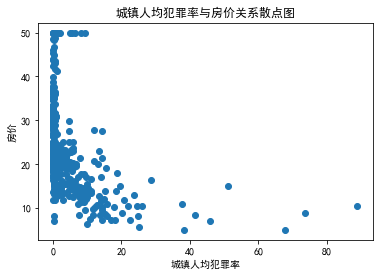

In [10]:
# （1）CRIM字段散点图分析
draw_scatter(df["CRIM"],y,"城镇人均犯罪率")

##### （1）城市犯罪率越高的地方，房价越低
#####  （2）高房价大多集中在城镇犯罪率低于10的区域内

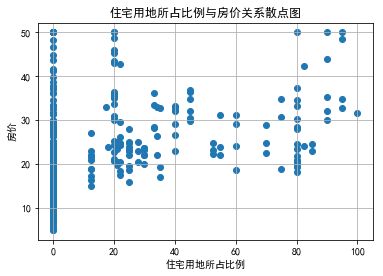

In [11]:
# (2)房价与住宅用地占地【zn】字段分析
draw_scatter(df["ZN"],y,"住宅用地所占比例")
plt.grid()

##### (1)住宅用地所占比例与房价无明显线性关系

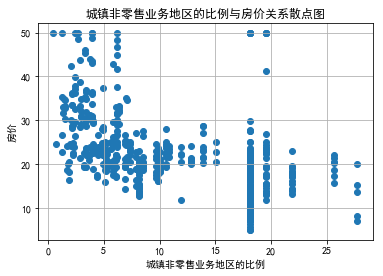

In [12]:
# (3) 字段INDUS与房价关系分析
draw_scatter(df["INDUS"],y,"城镇非零售业务地区的比例")
plt.grid()
plt.show()

##### (1)城镇非零售业务地区的比例与房价无明显线性关系

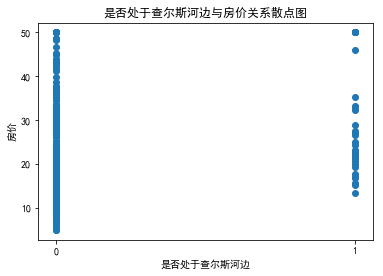

In [13]:
#（4） 是否位于查尔斯河旁边
plt.xticks([0,1])
draw_scatter(df["CHAS"],y,"是否处于查尔斯河边")

##### (1)处于查尔斯边的房价均价普遍较高

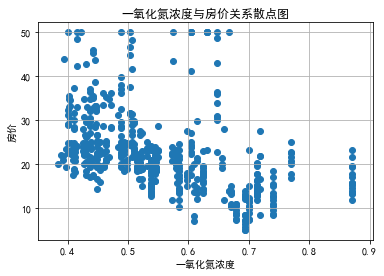

In [14]:
# (5) 一氧化氮浓度与房价关系分析
draw_scatter(df["NOX"],y,"一氧化氮浓度")
plt.grid()

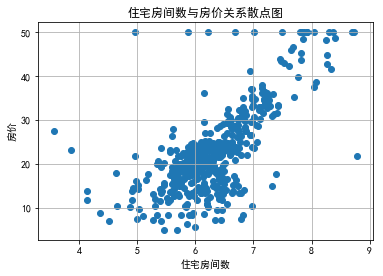

In [15]:
# (6)住宅RM与房价关系图
draw_scatter(df["RM"],y,"住宅房间数")
plt.grid()

#### (1)住宅房间数量与房间有明显的线性关系

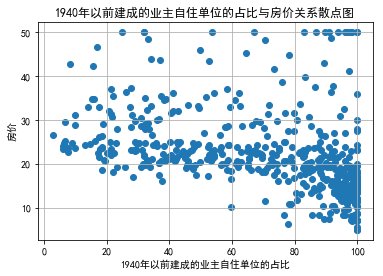

In [16]:
# (7)字段AGE与房价关系分析
draw_scatter(df["AGE"],y,"1940年以前建成的业主自住单位的占比")
plt.grid()

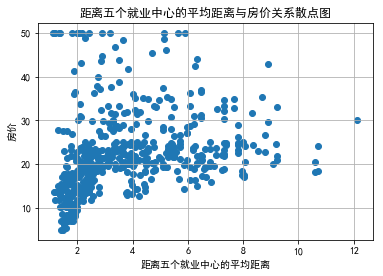

In [17]:
#(8) 字段DIS分析
draw_scatter(df["DIS"],y,"距离五个就业中心的平均距离")
plt.grid()

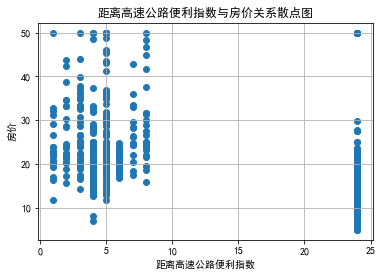

In [18]:
# (9) 字段RAD分析
draw_scatter(df["RAD"],y,"距离高速公路便利指数")
plt.grid()

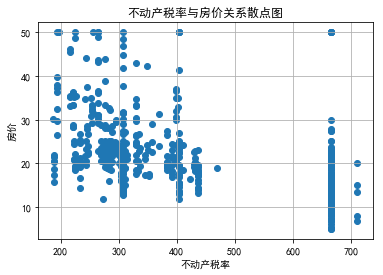

In [19]:
# (10) 字段TAX分析
draw_scatter(df["TAX"],y,"不动产税率")
plt.grid()

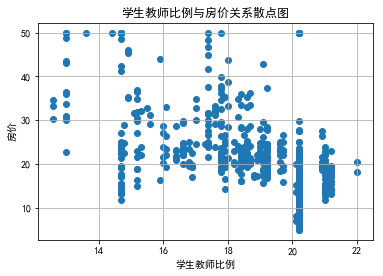

In [20]:
#(11) 字段PTRATIO分析
draw_scatter(df["PTRATIO"],y,"学生教师比例")
plt.grid()

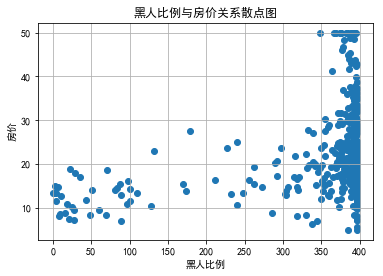

In [21]:
# (12)字段B分析
draw_scatter(df["B"],y,"黑人比例")
plt.grid()

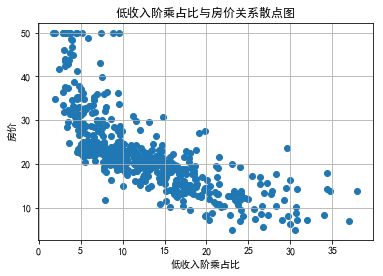

In [22]:
# (13)字段LSTAT分析
draw_scatter(df["LSTAT"],y,"低收入阶乘占比")
plt.grid()

### 4.数据处理

In [23]:
# 根据以上各个字段与房价之家的关系，对个字段数据进行分箱操作
# 自定义分箱区间
field_cut = {
    'CRIM' : [0,10,20, 100],
    'ZN' : [-1, 5, 18, 20, 40, 80, 86, 100], 
    'INDUS' : [-1, 7, 15, 23, 40],
    'NOX' : [0, 0.51, 0.6, 0.7, 0.8, 1],
    'RM' : [0, 4, 5, 6, 7, 8, 9],
    'AGE' : [0, 60, 80, 100],
    'DIS' : [0, 2, 6, 14],
    'RAD' : [0, 5, 10, 25],
    'TAX' : [0, 200, 400, 500, 800],
    'PTRATIO' : [0, 14, 20, 23],
    'B' : [0, 100, 350, 450],
    'LSTAT' : [0, 5, 10, 20, 40]
}



# 对数据集种的个字段进行分箱后再进行独热编码组合成新的DataFrame
cut_df = pd.DataFrame()
for field in field_cut.keys():
    cut_series = pd.cut(df[field],field_cut[field],right=True)
    onehot_df = pd.get_dummies(cut_series,prefix=field)
    cut_df = pd.concat([onehot_df,cut_df],axis=1)
new_df = pd.concat([df,cut_df],axis=1)
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,"ZN_(-1, 5]","ZN_(5, 18]","ZN_(18, 20]","ZN_(20, 40]","ZN_(40, 80]","ZN_(80, 86]","ZN_(86, 100]","CRIM_(0, 10]","CRIM_(10, 20]","CRIM_(20, 100]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0,1,0,0,0,0,0,1,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,1,0,0,0,0,0,0,1,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,1,0,0,0,0,0,0,1,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1,0,0,0,0,0,0,1,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,1,0,0,0,0,0,0,1,0,0


### 5.构建线性回归模型

In [24]:
# 使用交叉验证的方法评判回归模型的效果
# 方法一：KFold方法
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np

X = new_df.values
# 模型评估评分列表
scores_list = []

# 数据集随机拆分成五等分
kf = KFold(n_splits=5,shuffle=True)
for train_index,test_index in kf.split(x):
    # 获取训练集和测试集
    train_X = X[train_index]
    test_X = X[test_index]
    train_y = y[train_index]
    test_y = y[test_index]
    # 模型构建及训练
    linear_model = LinearRegression()
    linear_model.fit(train_X,train_y)
    # 模型评估
    score = linear_model.score(test_X,test_y)
    # 评估得分加入到列表中
    scores_list.append(score)
    print("评分列表：",scores_list)
    
print("平均得分：",np.mean(scores_list))

评分列表： [0.753232018529145]
评分列表： [0.753232018529145, 0.7981180633044774]
评分列表： [0.753232018529145, 0.7981180633044774, 0.8863132805441174]
评分列表： [0.753232018529145, 0.7981180633044774, 0.8863132805441174, 0.7770267483720328]
评分列表： [0.753232018529145, 0.7981180633044774, 0.8863132805441174, 0.7770267483720328, 0.7300037657412508]
平均得分： 0.7889387752982048


In [25]:
# 方法二：使用sklearn.model_selection中的cross_val_score方法
from sklearn.model_selection import cross_val_score
linear_model = LinearRegression()
kf = KFold(n_splits=5,shuffle=True)
score_arr = cross_val_score(linear_model,X,y,cv=kf)

print("评分列表：",score_arr)
print("平局得分：",score_arr.mean())

评分列表： [0.72471465 0.72985402 0.85618431 0.85363771 0.86292007]
平局得分： 0.8054621524509168
